In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

import pulse2percept as p2p

Call to deprecated function __init__.
Call to deprecated function mov2npy.
Call to deprecated function micron2deg. Use p2p.retina.ret2dva instead.
Call to deprecated function deg2micron. Use p2p.retina.dva2ret instead.
Call to deprecated function savemoviefiles. Use p2p.files.save_video instead.
Call to deprecated function npy2movie. Use p2p.files.save_video instead.
Call to deprecated function scale. Use p2p.stimuli.image2pulsetrain instead.
Call to deprecated function Movie2Pulsetrain. Use p2p.stimuli.video2pulsetrain instead.
Call to deprecated function retinalmovie2electrodtimeseries.


In [2]:
file = 'A-amplitude-sampling50-old'
stimfile = 'stim-%s.dat' % file
perceptfile = 'percept-%s.jpg' % file

In [3]:
# Place an Argus I array on the retina
argus = p2p.implants.ArgusII(x_center=0, y_center=0, h=50, rot=0*np.pi/180)

In [4]:
sim = p2p.Simulation(argus, engine='joblib', num_jobs=5)

In [5]:
# Set parameters of the optic fiber layer (OFL)
# In previous versions of the model, this used to be called the `Retina`
# object, which created a spatial grid and generated the axtron streak map.
sampling = 50       # spatial sampling of the retina (microns)
axon_lambda = 2        # constant that determines fall-off with axonal distance
sim.set_optic_fiber_layer(sampling=sampling, axon_lambda=axon_lambda,
                          x_range=[-2800, 2800], y_range=[-1700, 1700])

In [6]:
# Set parameters of the ganglion cell layer (GCL)
# In previous versions of the model, this used to be called `TemporalModel`.
t_gcl = 0.005 / 1000   # Sampling step (s) for the GCL computation
t_percept = 0.05       # Sampling step (s) for the perceptual output
sim.set_ganglion_cell_layer(tsample=t_gcl)

(<matplotlib.figure.Figure at 0x7f2ae0292a58>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2abf080198>)

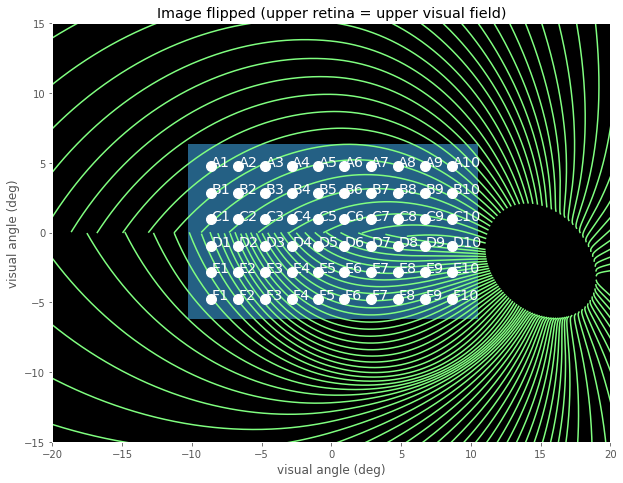

In [7]:
sim.plot_fundus()

In [8]:
# stim = p2p.stimuli.image2pulsetrain('letters/A.jpg', argus,
#                                     coding='amplitude', max_contrast=True,
#                                     rftype='gaussian', rfsize=argus[0].radius / 4.0,
#                                     invert=True, dur=0.1)

In [ ]:
stim = pickle.load(open(stimfile, 'rb'))

In [ ]:
percept = sim.pulse2percept(stim, t_percept=t_percept, tol=0.25)

2017-03-22 15:33:25,351 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-22 15:33:33,535 [pulse2percept.api] [INFO] tol=25.0%, 7797/7797 px selected


In [ ]:
frame = p2p.get_brightest_frame(percept)
plt.figure(figsize=(8, 5))
plt.imshow(frame.data, cmap='gray', vmin=0)
plt.grid('off')
plt.colorbar()

In [ ]:
plt.savefig(perceptfile)

In [ ]:
frame.data.min(), frame.data.max()

In [ ]:
img = frame.data / frame.data.max()

In [ ]:
img /= img.max()
img.min(), img.max()

In [ ]:
import skimage.io as sio

In [ ]:
sio.imsave(perceptfile, img)
print('Saved to file %s' % perceptfile)